In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [8]:
reviews=pd.read_csv("~/jupyterlab/amazon-reviews/data-2.csv",sep=",")

In [3]:
reviews.groupby(by='rating').count()

,title,content,country,date,images,verified,author,product,variant,url
rating,,,,,,,,,,
1.0,1831,1831,1832,1832,93,1832,1832,1832,1832,1832
2.0,790,790,790,790,30,790,790,790,789,790
3.0,841,841,841,841,29,841,841,841,841,841
4.0,935,934,935,935,44,935,935,935,935,935
5.0,1990,1990,1990,1990,117,1990,1990,1990,1990,1990


In [4]:
reviews_text=reviews['content']+" "+reviews['title']

In [5]:
text=str(list(reviews_text))

In [6]:
def clean_up(text,option):
    text = re.sub(r'==.*?==+', ' ', text)
    text = text.replace("’","'") # important
    text = text.replace("\\xa0"," ")
    text = text.replace('.','. ')
    text = text.replace('\n', ' ')
    text = text.replace("\'", "'")
    text = text.replace("\\\'", "'")
    text = text.replace("[","")
    text = text.replace("]","")
    text = text.replace("—"," ")
    text = text.replace("-"," ")
    text = text.replace("U.S","US")
    text = text.replace("D.C","DC")
    text = text.replace("p.m","pm")
    text = text.replace("a.m","am")
    text = text.replace(" '"," ")
    text = text.replace("' "," ")
    text = text.replace("\\ "," ")
    text = text.replace('“'," ")
    text = text.replace('”'," ")
    text = text.replace('"'," ")
    text = text.replace('\\\\'," ")
    text = text.replace('*'," ")
    text = text.replace('⭐️'," ")
    text=re.sub('[,\.!?/()]¿¡', ' ', text)
    text=text.lower()
    new_text=''
    for letter in text:
        if letter.isalpha() or (letter=="'" or letter==' '):
            new_text+=letter
        else:
            new_text+=' '
    if option: new_text=new_text[1:-1]
    new_text = new_text.replace("' "," ")
    new_text = new_text.replace(" '"," ")
    return new_text

In [7]:
new_text=clean_up(text,True)

In [8]:
words_list=new_text.split()

In [9]:
words_list=[x for x in words_list if x.isalpha() or x.find("'")]

In [10]:
len(list(set(words_list)))

9443

In [11]:
word_counts=list(pd.DataFrame(words_list).value_counts())14

In [12]:
aux=list(pd.DataFrame(words_list).value_counts().index)

In [13]:
words=[x[0] for x in aux]

In [14]:
print('Number of unique words:',len(words))

Number of unique words: 9443


In [15]:
rats=np.zeros(len(words))

In [16]:
rats2=np.zeros(len(words))

In [17]:
counts=np.zeros(len(words))

In [18]:
reviews['text']=[clean_up(str(txt),False) for txt in reviews_text]

In [19]:
words_l=[]
df_l=[]
for j in range(0,len(reviews['text'])):
    words_l.append(reviews['text'][j].split())
    words_l[j]=[x for x in words_l[j] if x.isalpha() or x.find("'")]
    df_l.append(pd.DataFrame(words_l[j],dtype=str).value_counts())

for i in range(0,len(words)):
    for j in range(0,len(reviews['text'])):
        try:
            cnt=int(df_l[j][words[i]])
        except KeyError:
            cnt=0
        counts[i]+=cnt
        rats[i]+=cnt*(reviews['rating'][j]-3.)/2.
        rats2[i]+=cnt*np.square((reviews['rating'][j]-3.)/2.)
rats=rats/counts
rats2=rats2/counts
std=np.sqrt(rats2-np.square(rats))
counts=counts.astype('int64')

In [90]:
array=list(np.transpose(np.array([words,rats,counts,std])))

In [91]:
df=pd.DataFrame(array,columns=['words','values','count','error'])

In [92]:
df['count']=df['count'].astype('int64')

In [93]:
df['values']=df['values'].astype('float64')

In [94]:
df['error']=df['error'].astype('float64')

In [95]:
df.to_csv('amazon_words.csv', sep=",", index=True)

In [2]:
df=pd.read_csv("amazon_words.csv",sep=",")

In [3]:
df_new=df.sort_values(by='values').dropna()

In [4]:
df_new.to_csv('amazon_words_df_new.csv', sep=",", index=True)

In [24]:
df_new[df_new['values']>0].sum(axis=0)

Unnamed: 0                                             16468808
words         aspurchaseeverythingwayxtlookingpackageturnsuc...
values                                              2019.630178
count                                                     89907
error                                                977.528506
dtype: object

In [28]:
df_new[df_new['values']>0].count(axis=0)/9443

Unnamed: 0    0.351477
words         0.351477
values        0.351477
count         0.351477
error         0.351477
dtype: float64

In [25]:
df_new[df_new['values']<=0].sum(axis=0)

Unnamed: 0                                             28107607
words         undetectedpublishheadingbillionheavenpuedenwip...
values                                             -2990.422338
count                                                    315375
error                                               2065.757947
dtype: object

In [27]:
df_new[df_new['values']<=0].count(axis=0)

Unnamed: 0    6123
words         6123
values        6123
count         6123
error         6123
dtype: int64

In [16]:
negmax=-0.35
posmin=0.25
count_lim=500

In [17]:
df_new_bSel=df_new[(df_new['count']>count_lim) & ((df_new['values']<negmax) | (df_new['values']>posmin))]
len_df=len(df_new_bSel)
print(len_df)

17


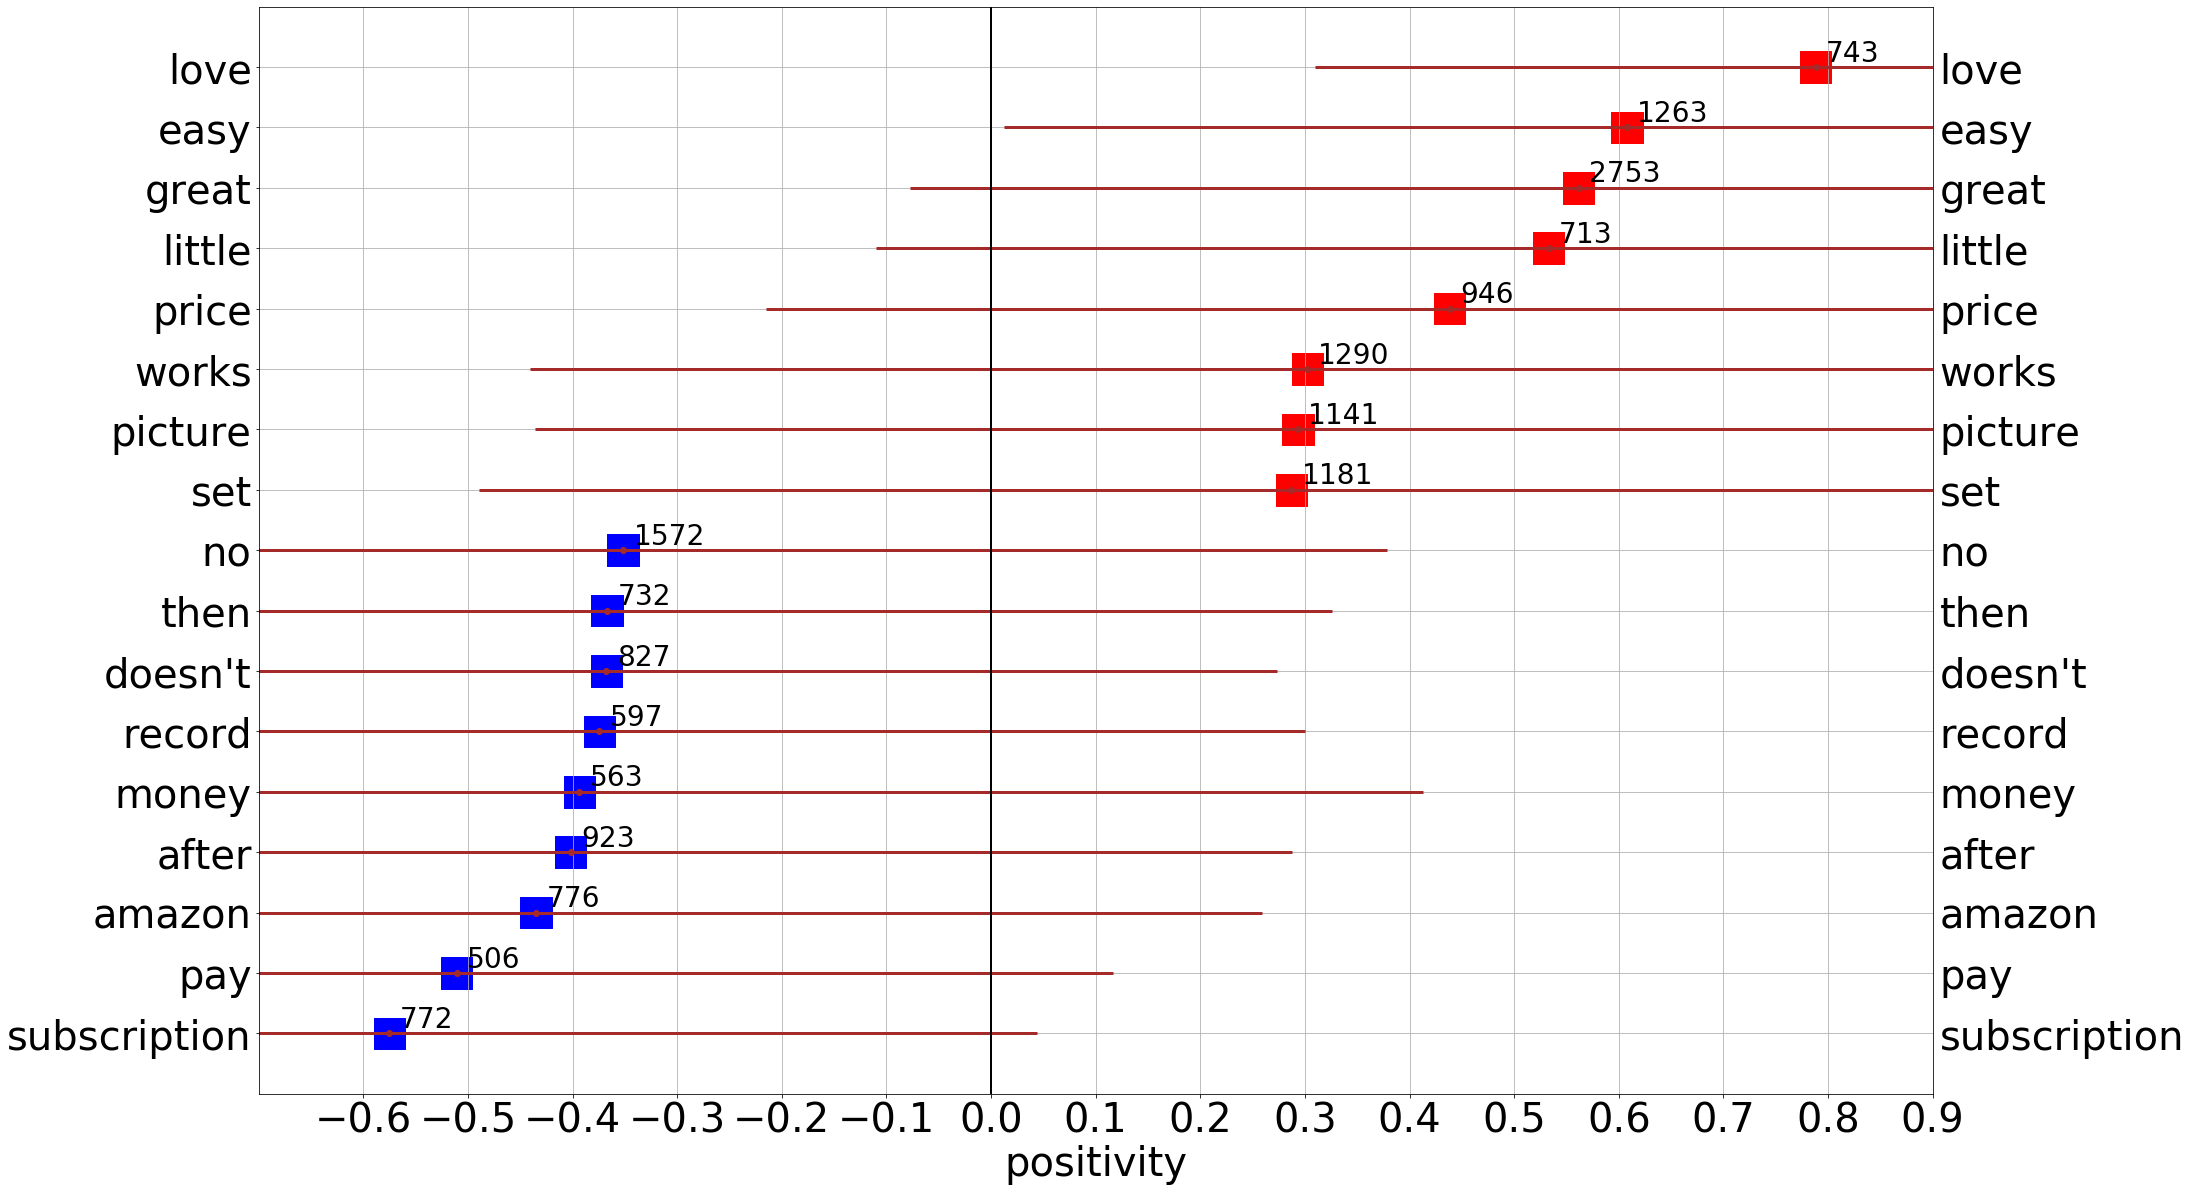

In [19]:
plt.rcParams["figure.figsize"] = (30,20)
colors = np.where(df_new_bSel["values"]>0,'r','b')
plt.scatter(df_new_bSel['values'],df_new_bSel['words'],color=colors,label='data',s=1000,marker='s')
plt.errorbar(df_new_bSel['values'],df_new_bSel['words'],xerr=df_new_bSel['error'], fmt='o',color='brown',elinewidth=3)
plt.plot([0,0],[-1,len_df],color='black',linewidth=2)
plt.ylim(-1,len_df)
plt.xlim(-0.7,0.9)
#plt.ylim(np.exp(m*X+b).min()*0.3,np.exp(m*X+b).max()*1.8)
plt.tick_params(axis='y', which='both', labelleft=True, labelright=True)
plt.yticks(fontsize=40,color='black')
#plt.xticks(np.arange(round(min(df_new_bSel['values']),1),round(max(df_new_bSel['values']),1)+0.1,0.1),fontsize=28)
plt.xticks(np.arange(-0.6,1.,0.1),fontsize=40)
plt.xlabel('positivity',fontsize=40,color='black')
plt.grid()
#coords_text=[[i,df_new_bSel['values'][i],str(df_new_bSel['count'][i])] for i in range(0,len_df)]
#plt.text(coords_text)
for i in range(0,len_df):
#    print(df_new_bSel['values'].iloc[i])
    plt.text(df_new_bSel['values'].iloc[i]+0.01,i,df_new_bSel['count'].iloc[i],horizontalalignment='left',verticalalignment='bottom',fontsize=28)
plt.savefig('reviews_plot.png')
print()

In [9]:
negmax2=-0.35
posmin2=0.3
count_lim2=200

In [10]:
df_new_bSel2=df_new[(df_new['count']>count_lim2) & ((df_new['values']<negmax2) | (df_new['values']>posmin2))]
len_df=len(df_new_bSel2)
print(len_df)

56


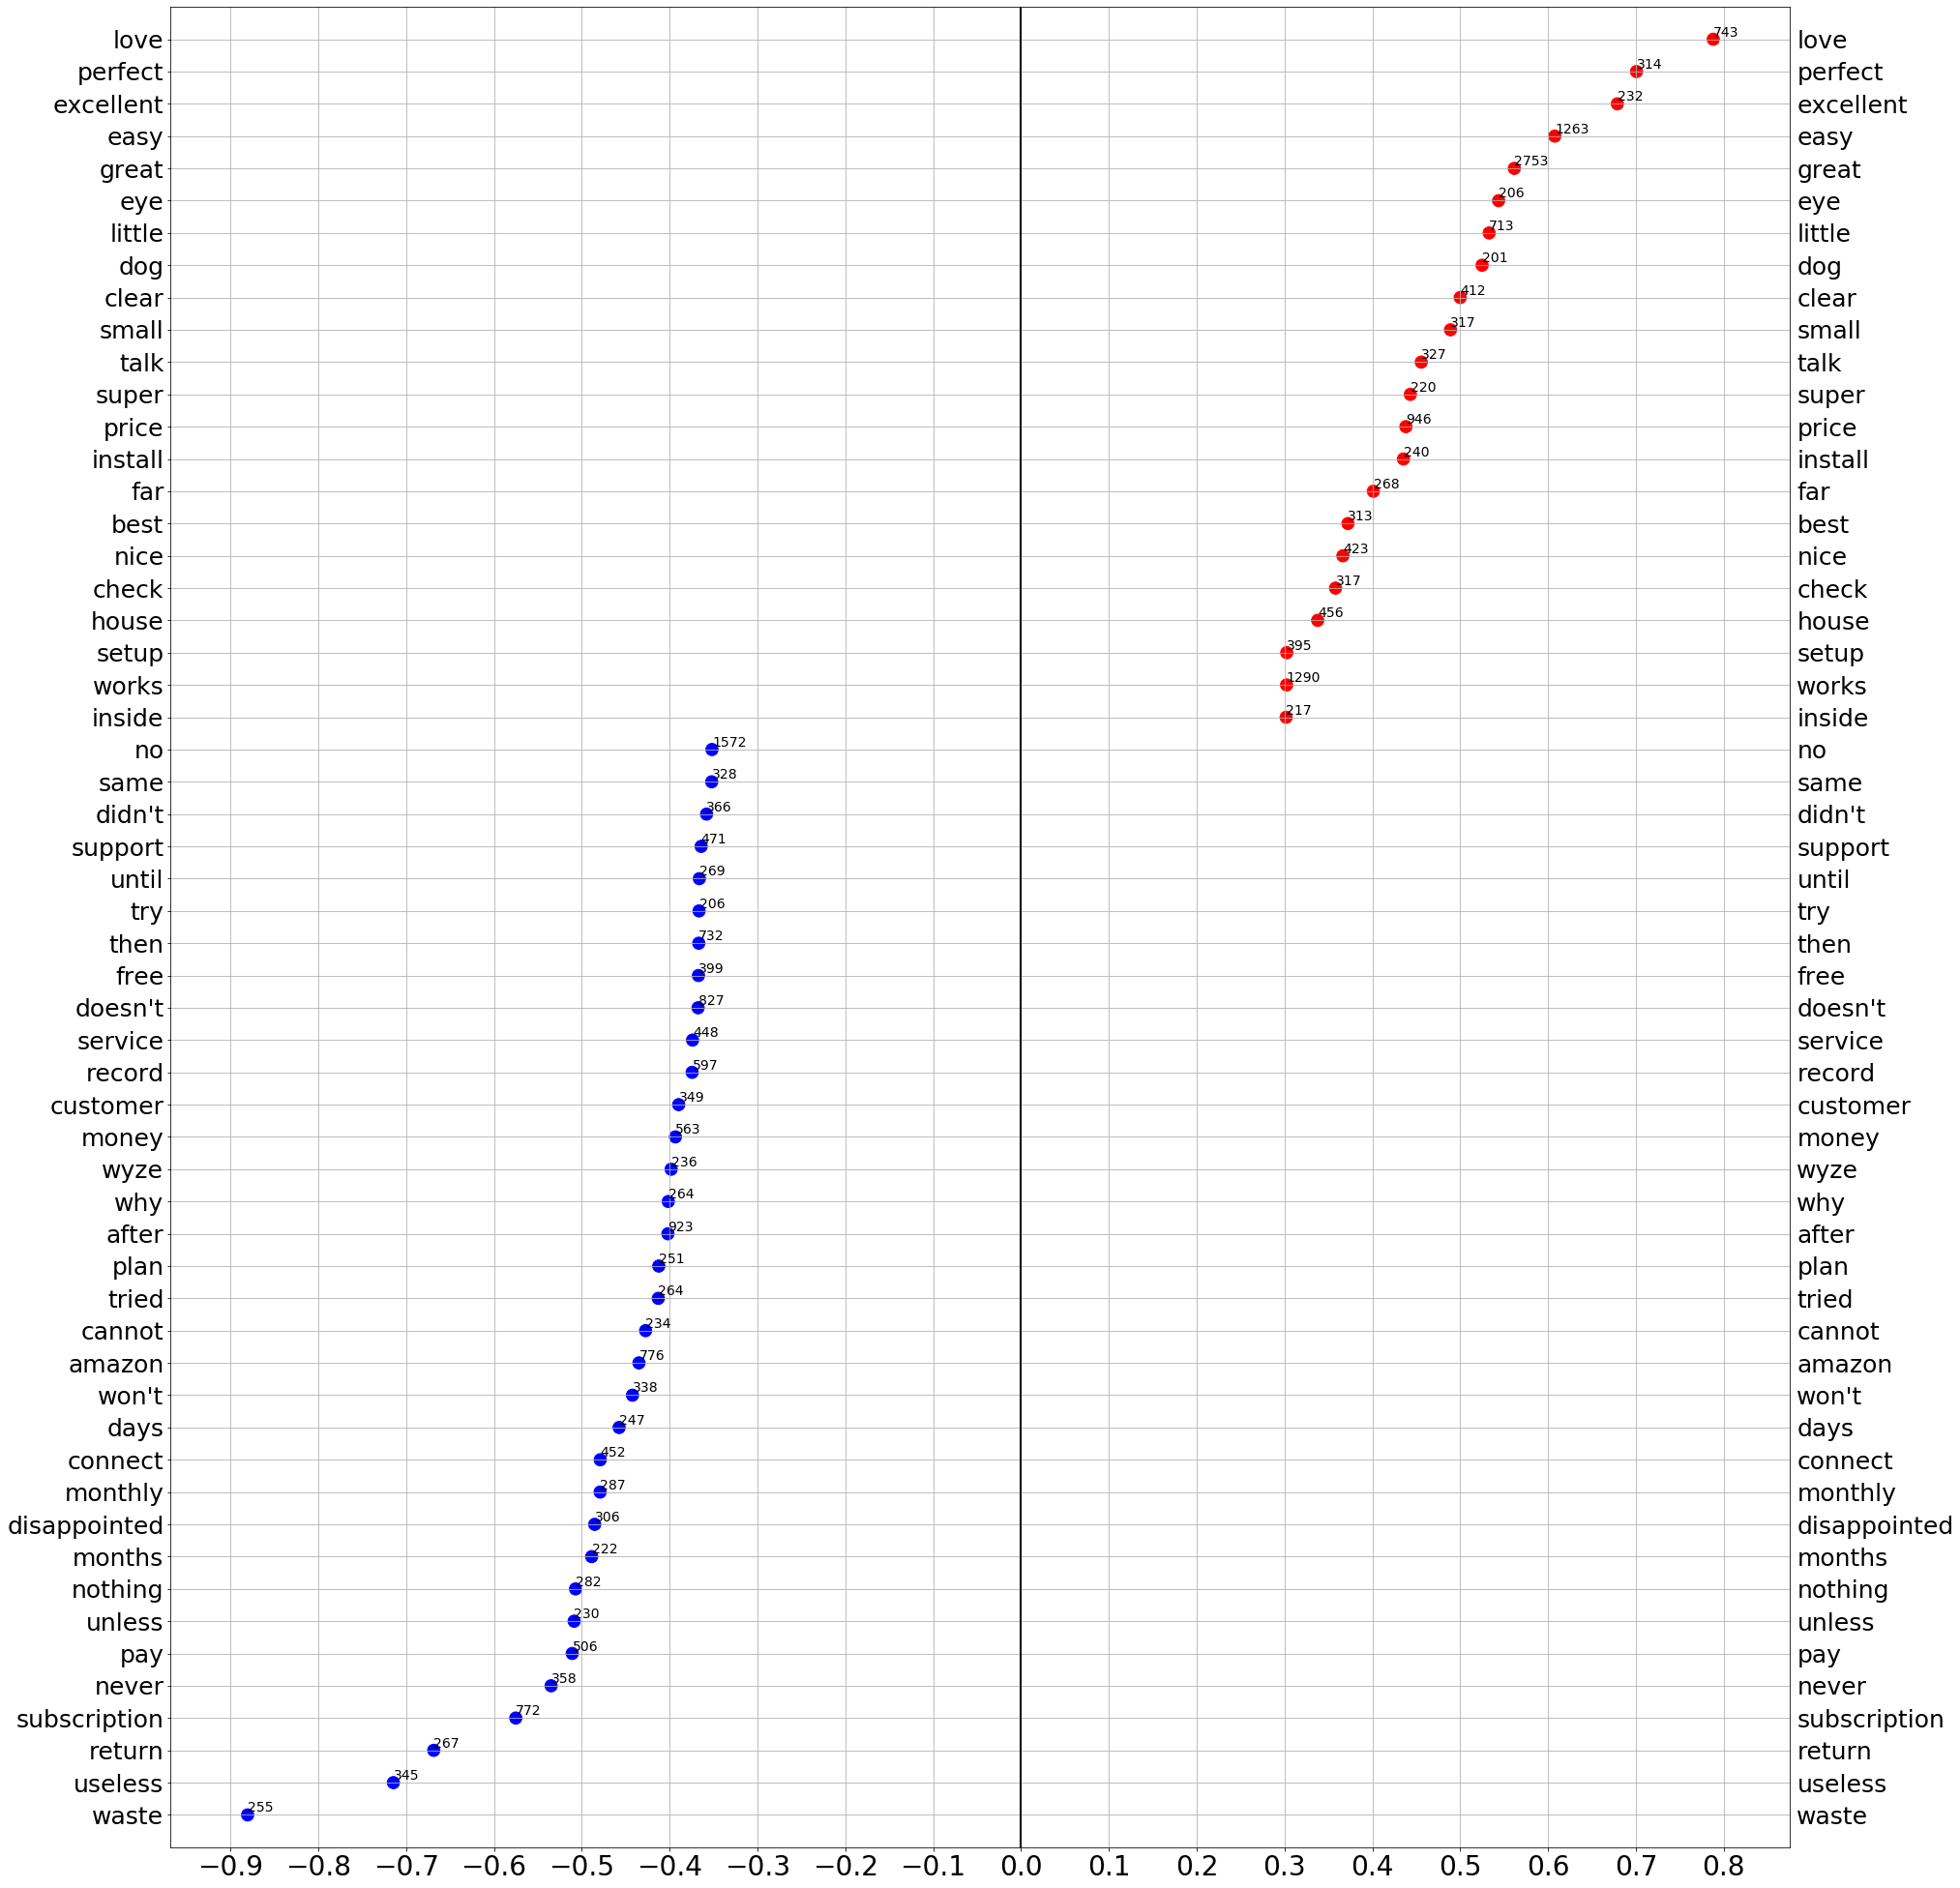

In [11]:
plt.rcParams["figure.figsize"] = (30,35)
colors = np.where(df_new_bSel2["values"]>0,'r','b')
plt.scatter(df_new_bSel2['values'],df_new_bSel2['words'],color=colors,label='data',s=160)
#plt.errorbar(df_new_bSel['values'],df_new_bSel['words'],xerr=df_new_bSel['error'], fmt='o',color='black')
plt.plot([0,0],[-1,56],color='black',linewidth=2)
plt.ylim(-1,len_df)
plt.tick_params(axis='y', which='both', labelleft=True, labelright=True)
plt.yticks(fontsize=25,color='black')
plt.xticks(np.arange(round(min(df_new_bSel2['values']),1),round(max(df_new_bSel2['values']),1)+0.1,0.1),fontsize=28)
plt.grid()
#coords_text=[[i,df_new_bSel['values'][i],str(df_new_bSel['count'][i])] for i in range(0,len_df)]
#plt.text(coords_text)
for i in range(0,len_df):
#    print(df_new_bSel['values'].iloc[i])
    plt.text(df_new_bSel2['values'].iloc[i],i,df_new_bSel2['count'].iloc[i],horizontalalignment='left',verticalalignment='bottom',fontsize=14)
print()

In [12]:
negmax3=0
posmin3=0
count_lim3=50

In [13]:
df_new_bSel3=df_new[(df_new['count']>count_lim3) & ((df_new['values']<negmax3) | (df_new['values']>posmin3))]
#df_new_bSel3=df_new[df_new.index%9==0]
len_df=len(df_new_bSel3)
print(len_df)

812


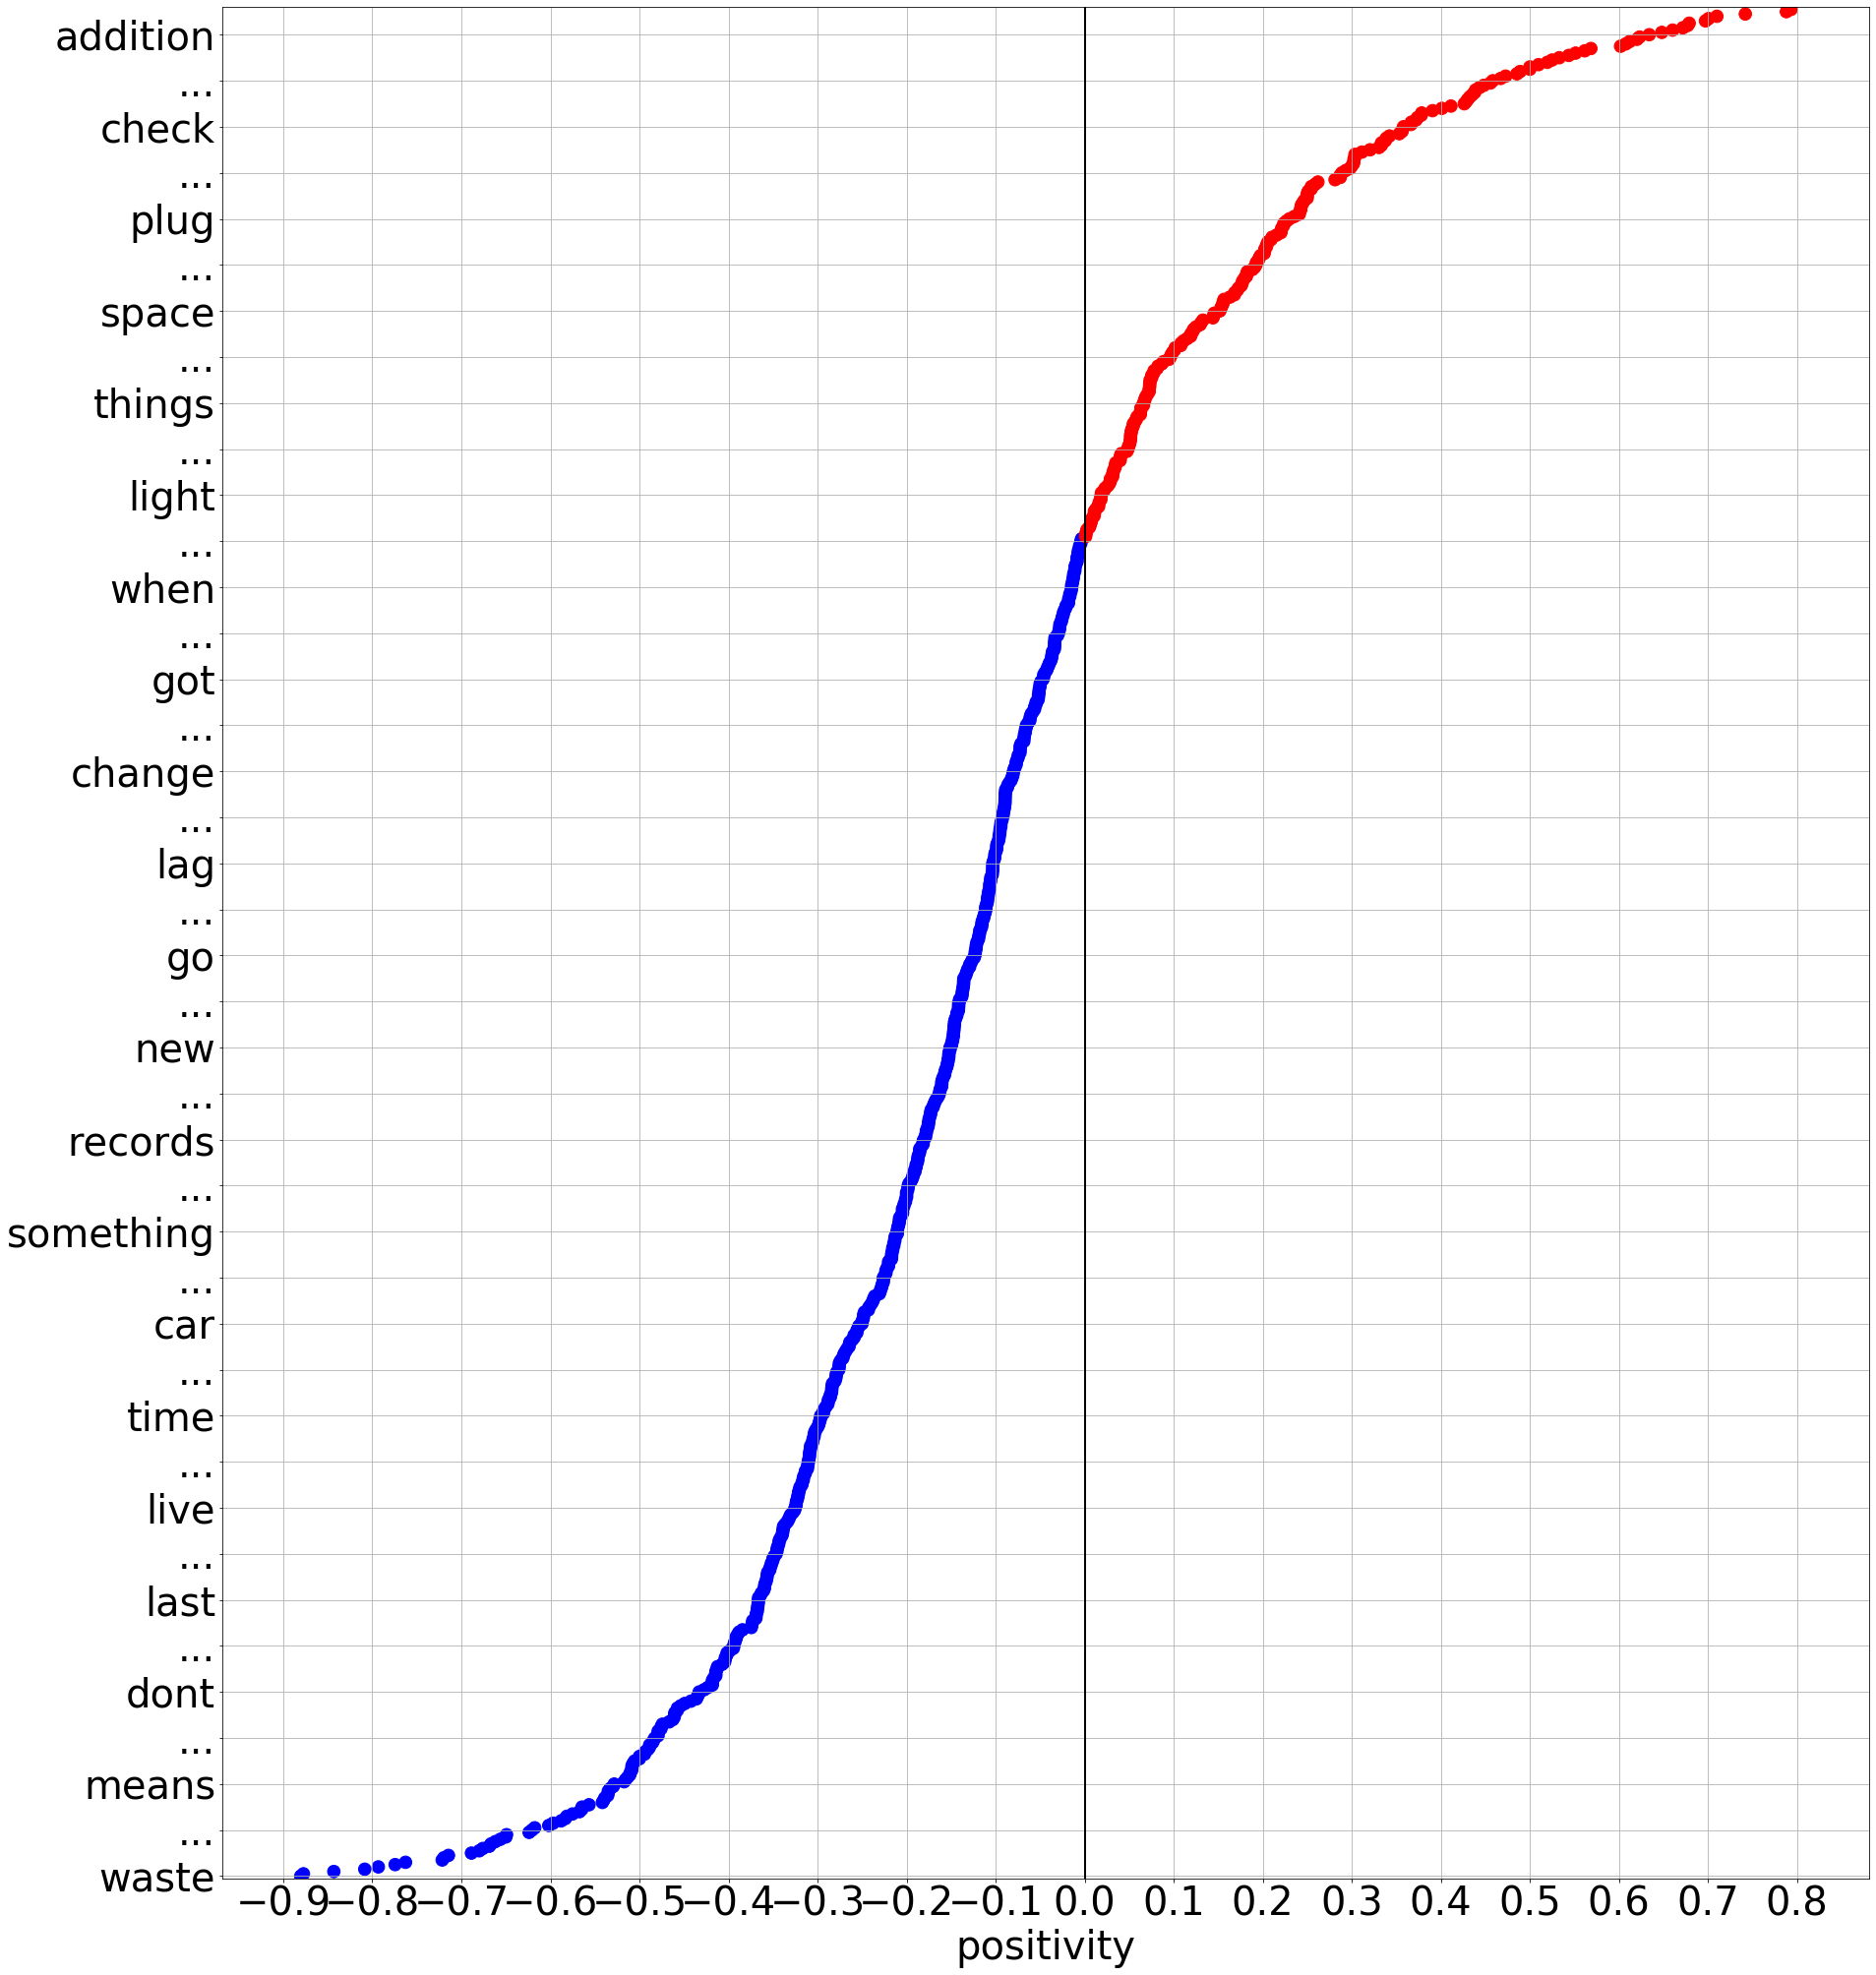

In [14]:
plt.rcParams["figure.figsize"] = (30,35)
colors = np.where(df_new_bSel3["values"]>0,'r',np.where(df_new_bSel3["values"]==0,'g','b'))
plt.scatter(df_new_bSel3['values'],df_new_bSel3['words'],color=colors,label='data',s=160)
#plt.plot(df_new_bSel3['values'],df_new_bSel3['words'],label='data',linewidth=2)
#plt.errorbar(df_new_bSel['values'],df_new_bSel['words'],xerr=df_new_bSel['error'], fmt='o',color='black')
plt.plot([0,0],[-1,len_df],color='black',linewidth=2)
plt.ylim(-1,len_df)
plt.tick_params(axis='y', which='both', labelleft=True, labelright=False)
#plt.yticks(fontsize=18,color='black')
plt.yticks([x for x in range(0,len_df,int(len_df/40))],labels=[np.where(i%40==0,(df_new_bSel3.reset_index())['words'][i],'...') for i in range(0,len_df,int(len_df/40))],fontsize=40)
plt.xticks(np.arange(round(min(df_new_bSel3['values']),1),round(max(df_new_bSel3['values']),1)+0.1,0.1),fontsize=40)
plt.xlabel('positivity',fontsize=40,color='black')
plt.grid()
plt.savefig('reviews_ilustration.png')
#for i in range(0,len_df):
#    print(df_new_bSel['values'].iloc[i])
#    plt.text(df_new_bSel3['values'].iloc[i],i,df_new_bSel3['count'].iloc[i],horizontalalignment='left',verticalalignment='bottom',fontsize=14)
print()